<a href="https://colab.research.google.com/github/NotNilfgaardian/Lab-1-MSIS/blob/main/Code-lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [2]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


In [3]:
from sklearn.model_selection import train_test_split
import os
import glob

In [4]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

In [5]:
import pandas as pd
import numpy as np

In [6]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

In [9]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')
!wc -l train.csv

10545 train.csv


In [10]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')
!wc -l test.csv

2642 test.csv


In [11]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,794,u427232,id427232,Возможно ли психическое благополучие без секса?,"Чтобы не стать в итоге невротиком, не впасть в...",2019-12-06 19:17,11,https://www.b17.ru/forum/topic.php?id=192494,0
1,306,u378569,The Princess of Shadows,the rules and I,Здравствуйте. Правила. Правило. ПравильноЭто...,2020-03-29 20:29,4,https://www.b17.ru/forum/topic.php?id=308529,0
2,889,u399150,Александра489,Чувство обузы и ненужности из детства.,Здравствуйте! я и моя мать и мой отец-все из п...,2019-11-11 20:28,4,https://www.b17.ru/forum/topic.php?id=188761,0


In [13]:
from tensorflow.keras import utils

In [14]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

In [15]:
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

In [16]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    print(type(stems))
    return stems

In [ ]:
upd_x_train = []

for i in x_train:
  upd_train = token_and_stem(i)
  upd_x_train.append(upd_train)

In [19]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
len(upd_x_train)


10532

In [21]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [22]:
x_train

0        Чтобы не стать в итоге невротиком, не впасть в...
1        Здравствуйте. Правила.  Правило.  ПравильноЭто...
2        Здравствуйте! я и моя мать и мой отец-все из п...
3        Добрый  вечер ).Читала темы многих пользовател...
4        По одной из теорий, в женщине должно быть 4 ип...
                               ...                        
10527    Здравствуйте.  Вкратце проблема такая.  Недавн...
10528    У меня началась терапия гормонами. С тех пор в...
10529    Вы узнаете, что у человека умер близкий или он...
10530    Добрый день! Завтра 2 месяца как трагически по...
10531    Здравствуйте! Я скрывала на этом сайте, чтобы ...
Name: MESSAGE, Length: 10532, dtype: object

In [ ]:
train

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [26]:
tokenizer.fit_on_texts(train)

In [ ]:
tokenizer.word_index

In [31]:
sequences = tokenizer.texts_to_sequences(train)

In [32]:
print(x_train[0])
print(train[0])
print(sequences[0])

Чтобы не стать в итоге невротиком, не впасть в состояние хронической мизогинии или мизандронии, не получить хроническую депрессию и т.д. А если возможно, то как? Как можно сублимировать сексуальное влечение, если партнера точно в ближайшем будущем найти шансов нет? Или же мы тут рабы физиологии и от этой природной врожденной дофамино-эндорфиновой зависимости никуда не деться?
['стат', 'итог', 'невротик', 'впаст', 'состоян', 'хроническ', 'мизогин', 'ил', 'мизандрон', 'получ', 'хроническ', 'депресс', 'т.д', 'есл', 'возможн', 'можн', 'сублимирова', 'сексуальн', 'влечен', 'есл', 'партнер', 'точн', 'ближайш', 'будущ', 'найт', 'шанс', 'ил', 'раб', 'физиолог', 'эт', 'природн', 'врожден', 'дофамино-эндорфинов', 'зависим', 'никуд', 'дет']
[277, 155, 3353, 95, 2078, 10, 125, 2078, 239, 370, 17, 93, 78, 741, 2241, 17, 685, 276, 1546, 364, 164, 949, 10, 4369, 4596, 1, 362, 746, 86]


In [33]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [36]:
import matplotlib.pyplot as plt

In [37]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169))
model_lstm.add(Dense(13, activation='softmax'))

In [38]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [39]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 169)               136552    
_________________________________________________________________
dense (Dense)                (None, 13)                2210      
Total params: 298,762
Trainable params: 298,762
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [41]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/15
33/33 [==============================] - 27s 761ms/step - loss: 2.4373 - accuracy: 0.0990 - val_loss: 6.1152 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_lstm.h5
Epoch 2/15
33/33 [==============================] - 24s 741ms/step - loss: 2.3807 - accuracy: 0.1040 - val_loss: 5.9819 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 25s 748ms/step - loss: 2.3448 - accuracy: 0.1491 - val_loss: 4.7488 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 24s 739ms/step - loss: 2.0962 - accuracy: 0.2512 - val_loss: 5.0620 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 24s 742ms/step - loss: 1.8700 - accuracy: 0.3255 - val_loss: 5.8099 - val_accuracy: 0.0000e+00

Epo

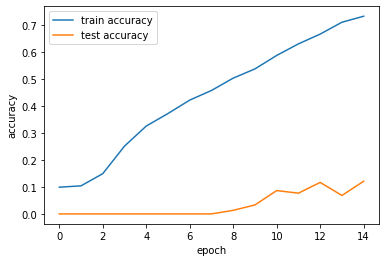

In [42]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend()
plt.show()

In [43]:
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [63]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,598,u4993,Вячеслав П,Где мы переживаем наше Я?,Узнать что теория психологии говорит о том где...,2020-01-16 12:16,5,https://www.b17.ru/forum/topic.php?id=298514,0
1,697,u273076,Ванэсса,Не умею любить. Поможете научиться?,"Я много лет думала, что знаю о любви всё. На с...",2019-12-25 17:19,9,https://www.b17.ru/forum/topic.php?id=295162,0
2,771,u2905,kraft,Ассертивность.,"Что думаете об ассертивности, о тренингах ассе...",2019-12-09 17:43,3,https://www.b17.ru/forum/topic.php?id=192913,0


In [64]:
x_test = test['MESSAGE']

In [65]:
test = []

for i in x_test:
  test_i = token_and_stem(i)
  test.append(test_i)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [66]:
tokens = []
x_test = []

for x_tr in test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  x_test.append(tokens)
  tokens = []

In [67]:
test_sequences = tokenizer.texts_to_sequences(x_test)

In [68]:
test = pad_sequences(test_sequences, maxlen=max_text_len)

In [69]:
from sklearn.metrics import classification_report

In [56]:
answer_y_test = np.argmax(y_test, axis=1)
answer_y_test[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
model_lstm.load_weights(model_lstm_save_path)
model_lstm.evaluate(test, y_test, verbose=1)

83/83 [==============================] - 5s 61ms/step - loss: 3.1440 - accuracy: 0.2896


[3.144031524658203, 0.2896133363246918]

In [72]:
pred = model_lstm.predict(test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred[:1000]

array([ 0,  7,  5,  8,  3,  5, 10,  6,  1,  1,  8,  3,  5,  9,  0,  1,  9,
        6,  5, 10,  5,  6,  8,  5,  0,  1,  5,  0,  8,  2,  1,  7,  7,  9,
        0,  2,  0,  8,  0,  6,  0,  5,  4,  1,  0,  1,  0,  5,  9,  6,  5,
        5,  2,  8,  1,  5,  5,  1,  7,  0,  9,  9,  9,  5,  1, 10,  9,  5,
        1,  0,  0,  5,  8,  5,  3,  6,  1, 10,  9,  5,  6,  9,  3,  9,  5,
        1,  1, 10,  0,  1,  3,  8,  8,  6,  2,  0,  1,  1,  0,  4,  5,  3,
        5,  8,  5,  5,  8,  3,  8,  5,  0,  8,  9,  0,  8,  0,  3,  5,  0,
        4,  0,  5,  6,  8,  5,  0,  8,  3,  0,  5,  5,  6,  3,  8,  5,  8,
        8,  5,  5,  0,  4,  6,  8,  1,  6,  6,  8,  1,  2,  5,  5,  0,  1,
        5,  8,  0,  8,  6, 10,  5,  0,  5,  0,  5,  1,  6,  1,  1,  0,  8,
        0,  6,  5,  8,  3,  8,  6,  0,  0,  7,  8,  0,  2,  0,  0,  1,  8,
        5,  5,  0,  5,  8,  5,  4,  8,  3,  3,  8,  0,  8,  5,  3,  3,  8,
        4,  6,  4,  0,  8,  5,  1,  8,  1, 10,  2,  5,  1, 10,  6,  5,  1,
        2,  9,  7,  1,  1

In [73]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [ 0  7  5  8  3  5 10  6  1  1]
              precision    recall  f1-score   support

           0       0.17      0.18      0.18       204
           1       0.20      0.30      0.24       202
           2       0.26      0.43      0.33       203
           3       0.32      0.46      0.37       203
           4       0.22      0.26      0.24       203
           5       0.33      0.46      0.38       201
           6       0.12      0.10      0.11       201
           7       0.35      0.25      0.30       205
           8       0.22      0.28      0.24       204
           9       0.50      0.52      0.51       203
          10       0.57      0.52      0.54       205
          11       0.00      0.00      0.00       202
          12       0.00      0.00      0.00       202

    accuracy                           0.29      2638
   macro avg       0.25      0.29      0.26      2638
weighted avg       0.25      0.29      0.26      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
